## Loading Library

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [35]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [36]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a information whether or not the dataset has missing values, total data in the dataset and the data type of each column.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-ff95d91b8088>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date
<ipython-input-38-ff95d91b8088>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['date_time']).dt.hour


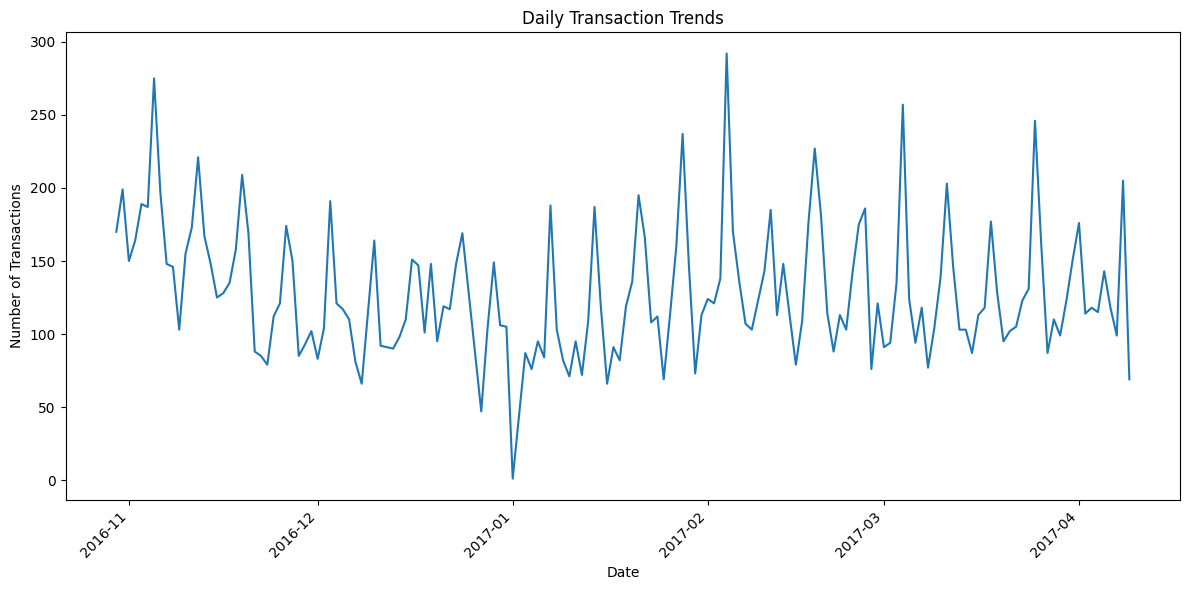

In [38]:
# 5
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

# Group by date and count transactions
daily_transactions = df.groupby('date')['Transaction'].count().reset_index()

# Plotting the daily transaction trends
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['Transaction'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [39]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

# Display the DataFrame
df[['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend', 'day', 'month', 'year', 'time', 'hour', 'day_name']].sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-8e21a82b0aaf>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
9049,4565,Coffee,2017-01-12 10:55:00,morning,weekday,12,1,2017,10:55:00,10,Thursday
6720,3375,Coffee,2016-12-17 16:40:00,afternoon,weekend,17,12,2016,16:40:00,16,Saturday
2080,1007,Alfajores,2016-11-10 17:23:00,evening,weekday,10,11,2016,17:23:00,17,Thursday
15409,7370,Tea,2017-03-01 09:45:00,morning,weekday,1,3,2017,09:45:00,9,Wednesday
68,34,Coffee,2016-10-30 11:25:00,morning,weekend,30,10,2016,11:25:00,11,Sunday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


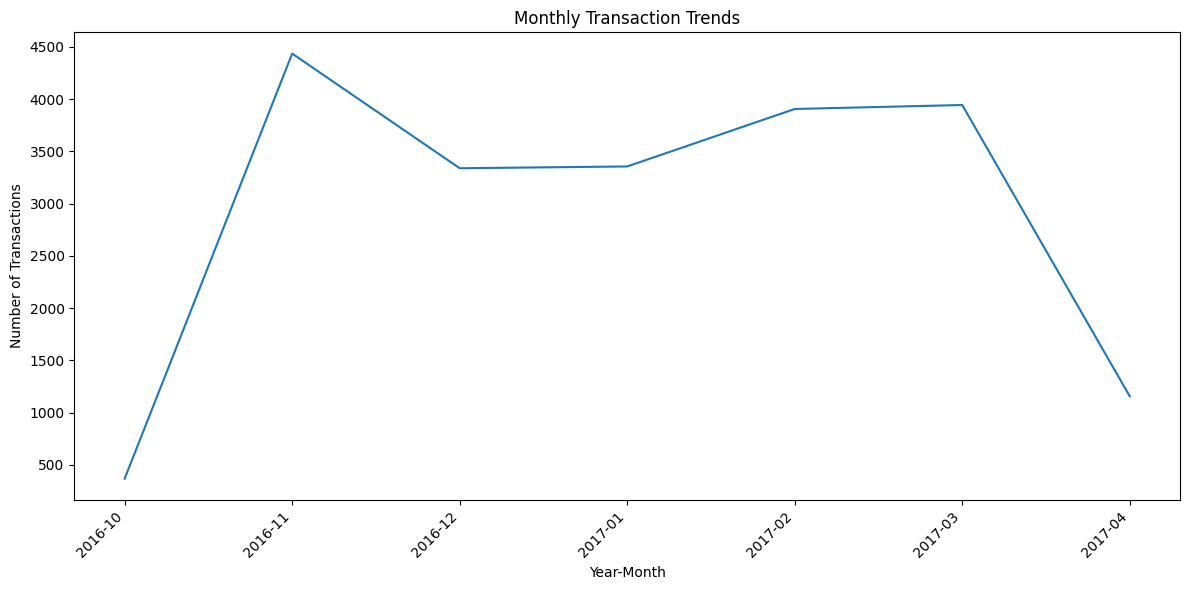

In [40]:
# 7
# Create a 'Year-Month' column
df['Year_Month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# Group by 'Year-Month' and count transactions
monthly_transactions = df.groupby('Year_Month')['Transaction'].count().reset_index()

# Plotting the monthly transaction trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['Year_Month'], monthly_transactions['Transaction'])
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transaction Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

8. Now, the visualization above provides better insights:Visualisasi menunjukkan tren transaksi bulanan, dengan peningkatan tajam pada November 2016, kemungkinan karena promosi atau belanja musiman. Transaksi menurun pada Desember, tetapi stabil dari Januari hingga Maret 2017. Namun, terjadi penurunan signifikan pada April 2017, yang mungkin disebabkan oleh faktor musiman atau penurunan permintaan, menunjukkan pola musiman yang jelas dan dampak dari promosi.

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [41]:
#9
# Get unique weekday names
weekday_names = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
print("Unique weekday names:", weekday_names)

# Get unique weekend names
weekend_names = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [42]:
#10
# Pivot the table
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)

# Reorder columns to start with Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]

# Display the table
display(transaction_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329.0,474.0,322.0,399.0,489.0,807.0,536.0
2,474.0,429.0,419.0,456.0,599.0,879.0,650.0
3,379.0,433.0,459.0,557.0,674.0,883.0,559.0
4,118.0,115.0,143.0,118.0,99.0,381.0,183.0
10,199.0,0.0,0.0,0.0,0.0,0.0,170.0
11,469.0,599.0,576.0,591.0,639.0,879.0,683.0
12,356.0,342.0,402.0,525.0,624.0,776.0,314.0


11. Wow, it turns out the insight that can be gained from the table above is terdapat pola di  Akhir pekan, terutama hari Sabtu, secara konsisten menunjukkan aktivitas yang lebih tinggi di sebagian besar bulan, menjadikannya hari dengan aktivitas puncak. Hari Minggu juga mencatat kinerja yang cukup baik di beberapa bulan. Aktivitas pada hari kerja cenderung berfluktuasi, dengan Selasa dan Jumat menunjukkan angka yang lebih tinggi di bulan tertentu, seperti Januari dan November. Data menunjukkan adanya pola musiman, di mana bulan seperti Maret dan November mencatat aktivitas yang lebih tinggi secara keseluruhan dibandingkan bulan seperti April yang mengalami penurunan tajam di semua hari. Selain itu, data untuk bulan Oktober sebagian besar tidak tersedia kecuali untuk hari Minggu, yang mungkin menunjukkan masalah dalam pengumpulan data atau periode tidak aktif. Secara keseluruhan, tren ini menyoroti lonjakan aktivitas pada akhir pekan, yang dapat dimanfaatkan untuk mengoptimalkan jadwal, alokasi sumber daya, atau upaya yang ditargetkan berdasarkan periode sibuk.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


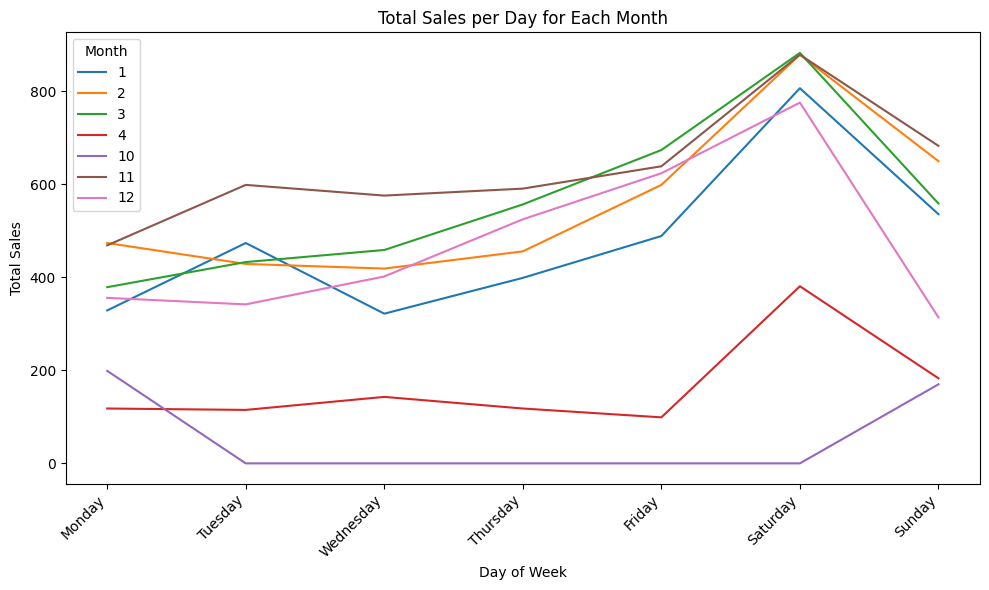

In [43]:
# 12
# Create the transaction table
transaction_table = df.groupby(['month', 'day_name'])['Transaction'].count().reset_index()
transaction_table = transaction_table.pivot(index='month', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_table = transaction_table[days_order]
transaction_table = transaction_table.astype(int)

# Transpose the table for the desired plot
transaction_table = transaction_table.T
# Create the line chart
transaction_table.plot(kind='line', figsize=(10, 6))
plt.title('Total Sales per Day for Each Month')
plt.xlabel('Day of Week')  # Changed x-axis label
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Month')  # Changed legend title
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that Grafik menunjukkan bahwa **hari Sabtu adalah puncak penjualan** di hampir semua bulan, dengan **Minggu juga cukup tinggi** di beberapa bulan. Penjualan pada **hari kerja bervariasi**, dengan beberapa bulan seperti November menunjukkan pola stabil, sementara bulan seperti April memiliki penjualan yang rendah. Bulan Oktober mencatat **kesenjangan data atau aktivitas minim**, kecuali pada hari Minggu. Pola ini menegaskan pentingnya **akhir pekan untuk strategi bisnis**, seperti alokasi sumber daya dan promosi pada hari-hari dengan penjualan tinggi.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [44]:
# 14
print(df['period_day'].unique())


['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [45]:
# 15
print(df.groupby('period_day')['hour'].unique())


period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Ya, ada hal yang aneh pada hasil tersebut, terutama pada period_day "morning". Jam yang masuk kategori "morning" mencakup jam 1, yang seharusnya lebih cocok dimasukkan ke dalam "night", karena jam 1 dini hari umumnya dianggap bagian dari malam, bukan pagi.

Kesalahan ini mungkin terjadi karena pengelompokan atau pengaturan rentang waktu untuk period_day tidak sesuai. Sebaiknya rentang waktu didefinisikan ulang agar lebih konsisten dan sesuai dengan kebiasaan umum. Dengan pembagian yang lebih jelas, data akan lebih akurat dan interpretasi lebih masuk akal.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


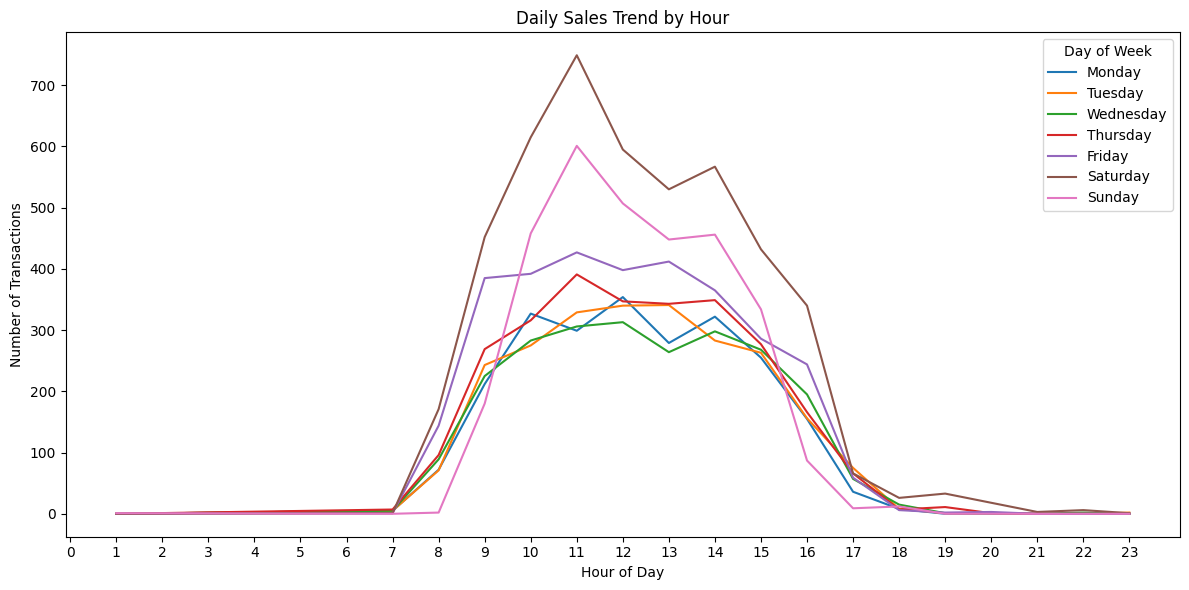

In [46]:
# 17
# Group by day and hour, then count transactions
daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

# Pivot the table for plotting
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)

# Ensure days are in the desired order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]

# Create the line chart
daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that Plot tren penjualan harian mengungkapkan bahwa transaksi mengikuti pola yang konsisten di seluruh hari dalam seminggu. Penjualan mulai meningkat di pagi hari (sekitar pukul 8 pagi), mencapai puncaknya antara pagi hingga siang hari (pukul 10 pagi hingga 2 siang), dan kemudian secara bertahap menurun sepanjang sisa hari, dengan penurunan signifikan setelah pukul 4 sore. Hari Sabtu menonjol dengan puncak transaksi tertinggi dibandingkan hari lainnya, menunjukkan bahwa itu adalah hari yang paling sibuk. Hari Minggu dan Jumat juga menunjukkan puncak yang relatif tinggi, sementara hari pertengahan minggu seperti Selasa dan Rabu menunjukkan tingkat transaksi yang lebih moderat. Tren ini menyoroti pentingnya fokuskan sumber daya pada jam-jam puncak, terutama di akhir pekan.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


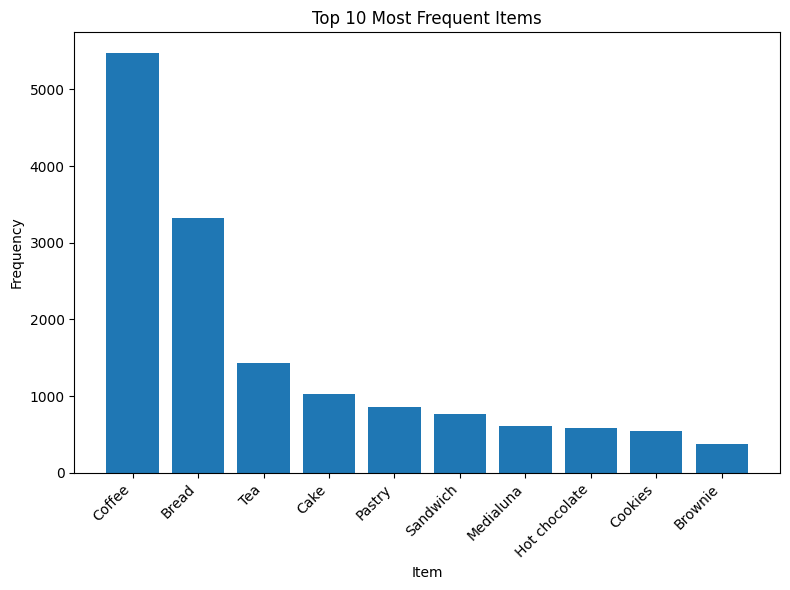

In [47]:
# 19
# Group by item and count occurrences
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(8, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-0d8f4d695ee5>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


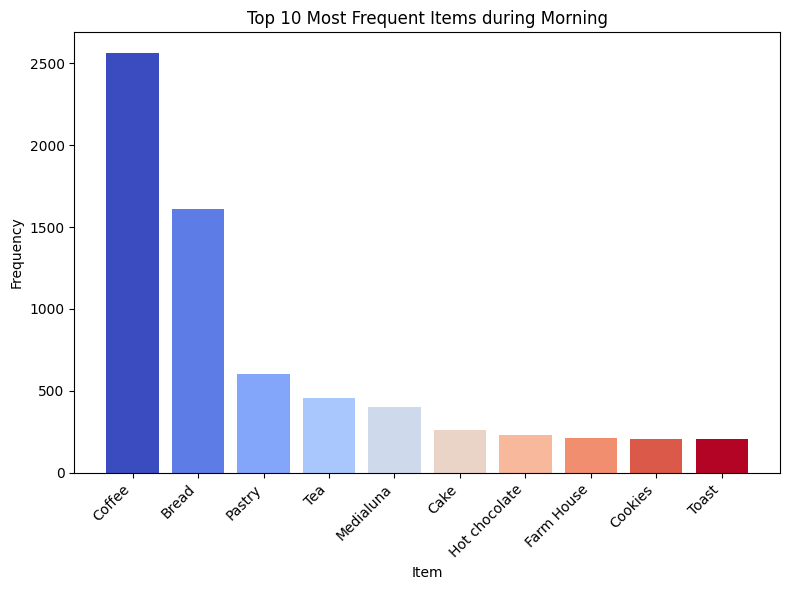

<ipython-input-48-0d8f4d695ee5>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


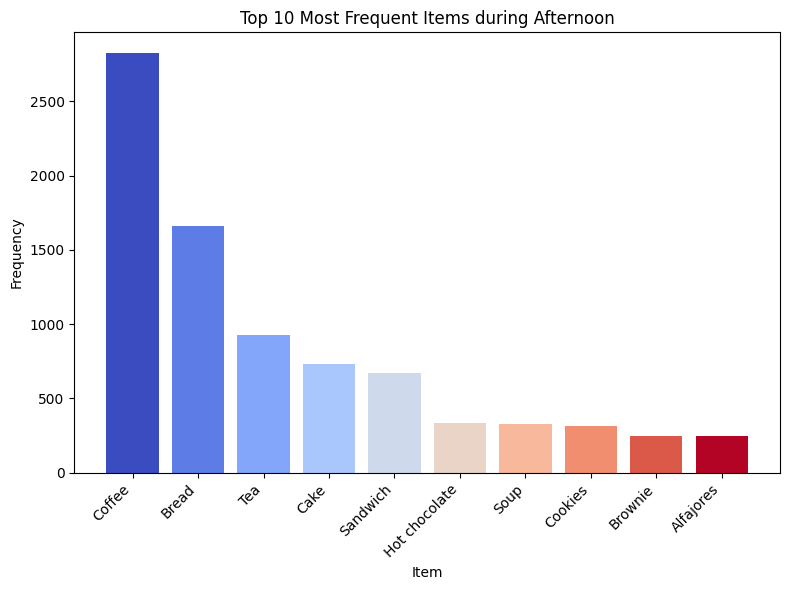

<ipython-input-48-0d8f4d695ee5>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


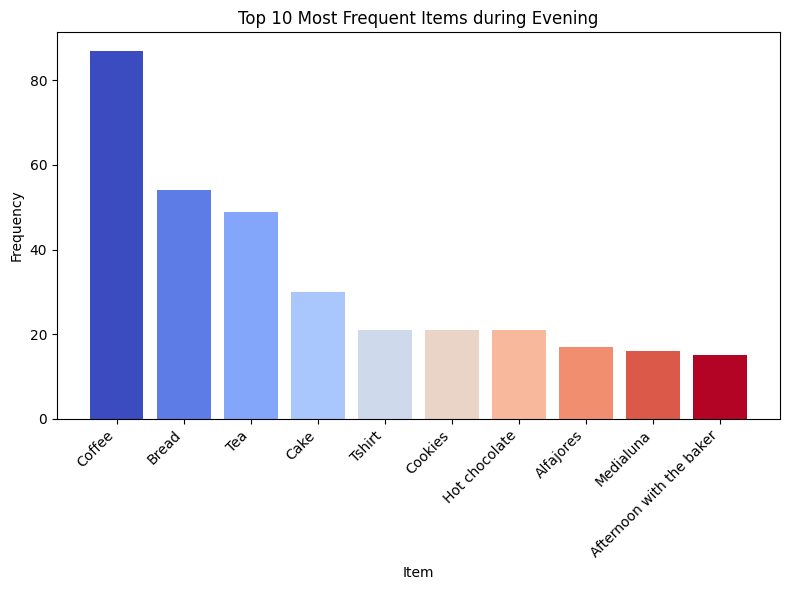

<ipython-input-48-0d8f4d695ee5>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap


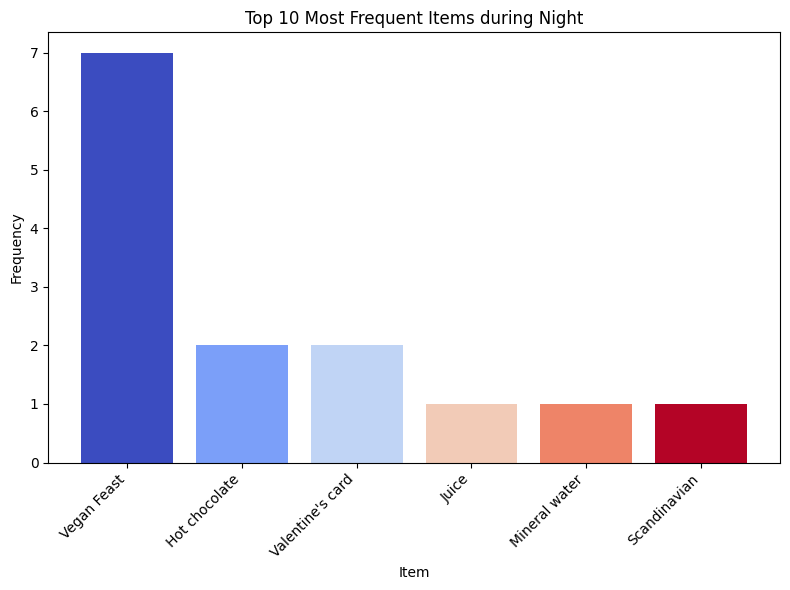

In [48]:
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = df[df['period_day'] == period]

    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(8, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10)))  # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is bahwa setiap periode waktu—pagi, siang, sore, dan malam—menunjukkan tren yang berbeda dalam frekuensi penjualan barang, yang mengungkapkan bagaimana perilaku konsumen berubah sepanjang hari. Misalnya, pada pagi hari, barang-barang seperti kopi atau produk sarapan mungkin lebih populer, mencerminkan rutinitas dan preferensi orang-orang di awal hari. Pada siang hari, barang-barang seperti camilan atau minuman dapat mengalami lonjakan permintaan, karena orang-orang mencari peningkatan energi atau makan kecil. Saat sore hari, popularitas barang-barang yang berhubungan dengan makan malam atau camilan yang lebih berat mungkin meningkat, terutama saat orang-orang mulai bersantai setelah bekerja. Pada malam hari, jenis makanan kenyamanan atau camilan larut malam mungkin mendominasi penjualan. Variasi ini menunjukkan bahwa barang-barang yang berbeda memenuhi kebutuhan atau kebiasaan tertentu berdasarkan waktu. Dengan mengidentifikasi pola-pola ini, bisnis dapat lebih baik menyelaraskan strategi pemasaran, promosi, dan manajemen inventaris dengan waktu permintaan puncak, memastikan bahwa sumber daya dialokasikan secara efisien selama periode permintaan tinggi dan menghindari kelebihan stok pada waktu-waktu yang lebih sepi.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

In [49]:
print(df[df['Item'] == 'Valentine card'].shape[0])

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


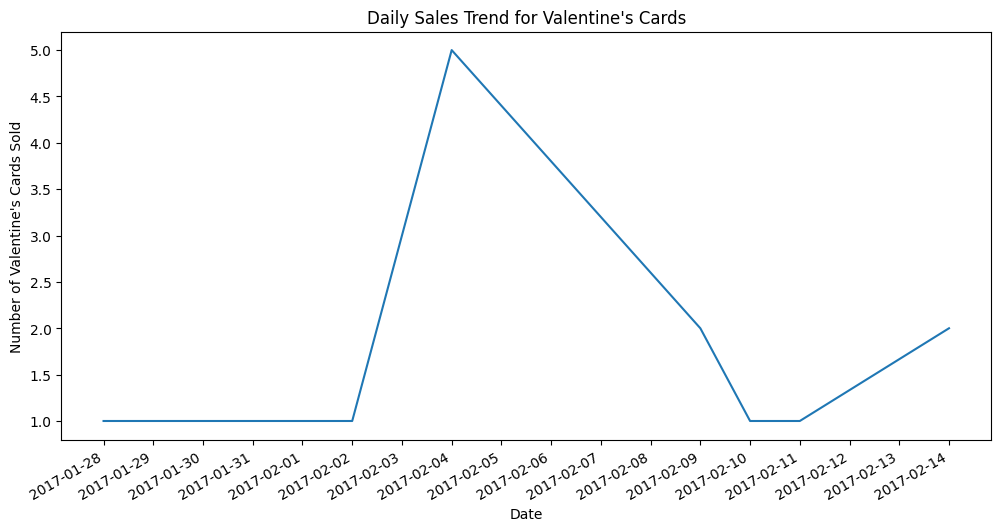

In [50]:
#22
valentines_card_transactions = df[df['Item'] == "Valentine's card"]

# Group by date and count transactions
valentines_sales_by_date = valentines_card_transactions.groupby('date')['Transaction'].count()


# Plot daily transaction trends for Valentine's card
plt.figure(figsize=(12, 6))
plt.plot(valentines_sales_by_date.index, valentines_sales_by_date.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Adjust interval as needed
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Number of Valentine\'s Cards Sold')
plt.title('Daily Sales Trend for Valentine\'s Cards')
plt.show()

23. I found the insight from the sale of the Valentine's cards above is
Tren penjualan kartu Valentine menunjukkan tingkat penjualan yang stabil dan rendah dari akhir Januari hingga awal Februari, diikuti dengan peningkatan tajam sekitar 2 Februari, mencapai puncaknya pada 5 Februari dengan lebih dari 5 kartu terjual per hari. Setelah puncak tersebut, penjualan secara bertahap menurun, mencapai titik terendah pada 10 dan 11 Februari. Namun, terdapat sedikit kenaikan penjualan menjelang Hari Valentine, menunjukkan adanya lonjakan dari pembeli yang membeli secara mendadak. Secara keseluruhan, permintaan tertinggi terjadi sekitar 10 hari sebelum Hari Valentine.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [51]:
# 24
# Group data by 'Transaction' and 'Item' and sum quantities
df['Quantity'] = df.groupby(['Transaction', 'Item'])['Item'].transform('count')

# Drop duplicate rows to keep only one entry for each item per transaction
df = df.drop_duplicates(subset=['Transaction', 'Item'])

# Create a pivot table to represent transactions
transaction_data = df.pivot_table(index='Transaction', columns='Item', values='Quantity', aggfunc='sum').fillna(0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#25
# Convert quantities to 1 and 0
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the transaction data
display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-52-85c49d3072ca>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [53]:
# 26
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [54]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
display(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:
Tren transaksi harian menunjukkan bahwa toko roti mencapai puncak penjualan pada akhir pekan (Sabtu dan Minggu), yang konsisten dengan kebiasaan orang yang memiliki waktu luang lebih banyak di akhir pekan dan menikmati roti sebagai bagian dari rutinitas mereka. Toko roti cenderung paling ramai antara pukul 10 pagi hingga 12 siang, yang menunjukkan bahwa pelanggan sering mengunjungi toko untuk camilan pagi atau siang, atau untuk membeli roti untuk makanannya. Penjualan umumnya meningkat menjelang akhir tahun, kemungkinan dipengaruhi oleh musim liburan dan perayaan.

**Popularitas Produk:**
- Produk paling populer adalah Kopi, Roti, dan Teh, yang mencerminkan penawaran inti toko roti dan preferensi pelanggan terhadap produk dasar ini.
- Popularitas produk seperti Kopi, Roti, Teh, dan Pastry tetap konsisten di berbagai periode (pagi, siang, sore, malam), menunjukkan bahwa preferensi pelanggan terhadap produk ini tidak dipengaruhi oleh waktu hari.
- Namun, pada sore hari, penjualan produk seperti Kue, Hot Chocolate, dan Cookies relatif tinggi, menunjukkan bahwa produk tersebut lebih disukai sebagai camilan sore.
- Kartu Valentine mengalami puncak penjualan pada bulan Februari, terutama sekitar tanggal 14 Februari (Hari Valentine), yang diperkirakan karena karakter produk tersebut.

**Asosiasi Produk (Algoritma Apriori):**
- Algoritma Apriori mengungkapkan asosiasi antara produk yang sering dibeli bersama. Misalnya, Kopi dan Toast sering dibeli bersama, yang ditunjukkan oleh nilai lift yang tinggi.
- Asosiasi lain termasuk Kopi dengan Medialuna, Pastry, dan Cake. Ini bisa membantu dalam pembuatan penawaran bundling atau promosi yang mendorong pembelian produk-produk tersebut bersama-sama.

**Rekomendasi:**
Berdasarkan wawasan ini, berikut beberapa rekomendasi untuk toko roti:
1. **Staf dan Inventaris:** Optimalkan jumlah staf dan pengelolaan inventaris untuk mengakomodasi permintaan yang lebih tinggi pada jam sibuk (10 pagi hingga 12 siang) dan akhir pekan.
2. **Strategi Promosi:** Pertimbangkan untuk menawarkan paket bundling atau diskon untuk kombinasi produk populer, seperti Kopi dan Toast, untuk mendorong pembelian lebih banyak.
3. **Fokus Produk:** Fokuskan pada produk inti seperti Kopi, Roti, Teh, dan Pastry, sambil memastikan pasokan yang cukup untuk memenuhi permintaan yang konsisten.
4. **Musiman dan Acara Khusus:** Manfaatkan musim liburan dan acara khusus seperti Hari Valentine dengan kampanye pemasaran dan penawaran produk yang ditargetkan untuk meningkatkan penjualan.
5. **Camilan Sore:** Promosikan produk seperti Cookies, Cake, dan Hot Chocolate pada sore hari untuk memenuhi permintaan camilan sore pelanggan.

Dengan memanfaatkan wawasan berbasis data dan melaksanakan rekomendasi ini, toko roti dapat meningkatkan penawaran mereka, mengoptimalkan operasional, dan meningkatkan kepuasan pelanggan.
